In [30]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [31]:
df = pd.read_csv('test_logs.csv', sep=';')
filled = df[df['action'] == 'filled'] # keep only filled rows, since other do not have useful information

In [50]:
filled['total'] = filled['tradePx'] * filled['tradeAmt'] # total amount of money spend on transaction
filled['total'][filled['orderSide'] == 'buy'] *= -1 # set money in buying operations as negavive to simplify calculating cumulative sum

In [51]:
filled['PnL'] = filled['total'].cumsum() # calculate cumulative PnL
filled['grouppedPnL'] = filled.groupby('orderProduct')['total'].cumsum() # calculate cumulative PnL groupped by security ID

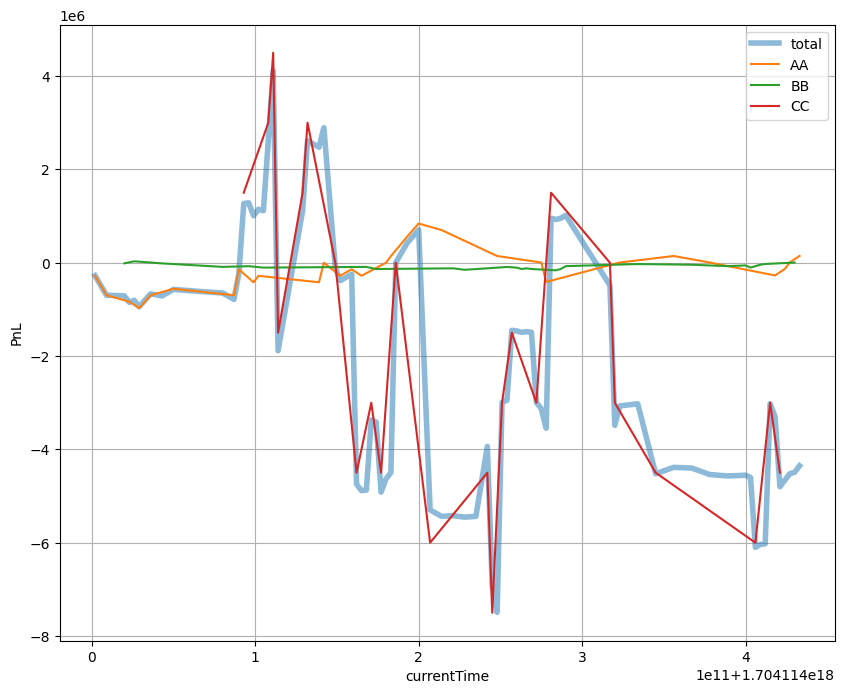

In [56]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.xlabel('currentTime')
plt.ylabel('PnL')

plt.plot(filled['currentTime'], filled['PnL'], lw=4, alpha=0.5, label='total')
for prod in filled['orderProduct'].unique():
    p = filled[filled['orderProduct'] == prod]
    plt.plot(p['currentTime'], p['grouppedPnL'], label=prod)
plt.legend()
plt.show()